In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from pathlib import Path
import random

data_path = Path('visual-taxonomy/')
test_image_path = data_path / 'test_images'
train_image_path = data_path / 'train_images'
print(data_path)

visual-taxonomy


In [2]:
df_train = pd.read_csv(data_path / 'train.csv')
df_test = pd.read_csv(data_path / 'test.csv')
print(df_train.describe())
print(df_test.describe())

                 id           len
count  70213.000000  70213.000000
mean   35254.985872      8.850569
std    20295.174166      1.559819
min        0.000000      5.000000
25%    17718.000000      8.000000
50%    35272.000000     10.000000
75%    52825.000000     10.000000
max    70378.000000     10.000000
                 id
count  30205.000000
mean   15298.870386
std     8819.716025
min        0.000000
25%     7623.000000
50%    15371.000000
75%    22937.000000
max    30488.000000


In [3]:
print(df_train.head())
print('---')
print(df_test.head())

   id     Category  len      attr_1 attr_2   attr_3   attr_4         attr_5  \
0   0  Men Tshirts    5     default  round  printed  default  short sleeves   
1   1  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   
2   2  Men Tshirts    5     default   polo    solid    solid  short sleeves   
3   3  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   
4   4  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   

  attr_6 attr_7 attr_8 attr_9 attr_10  
0    NaN    NaN    NaN    NaN     NaN  
1    NaN    NaN    NaN    NaN     NaN  
2    NaN    NaN    NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN     NaN  
---
   id     Category
0   0  Men Tshirts
1   1  Men Tshirts
2   2  Men Tshirts
3   3  Men Tshirts
4   4  Men Tshirts


In [4]:
from PIL import Image

In [5]:
'000000.jpg' in os.listdir(train_image_path)

True

In [6]:
train_range = range(len(df_train))
test_range = range(len(df_test))

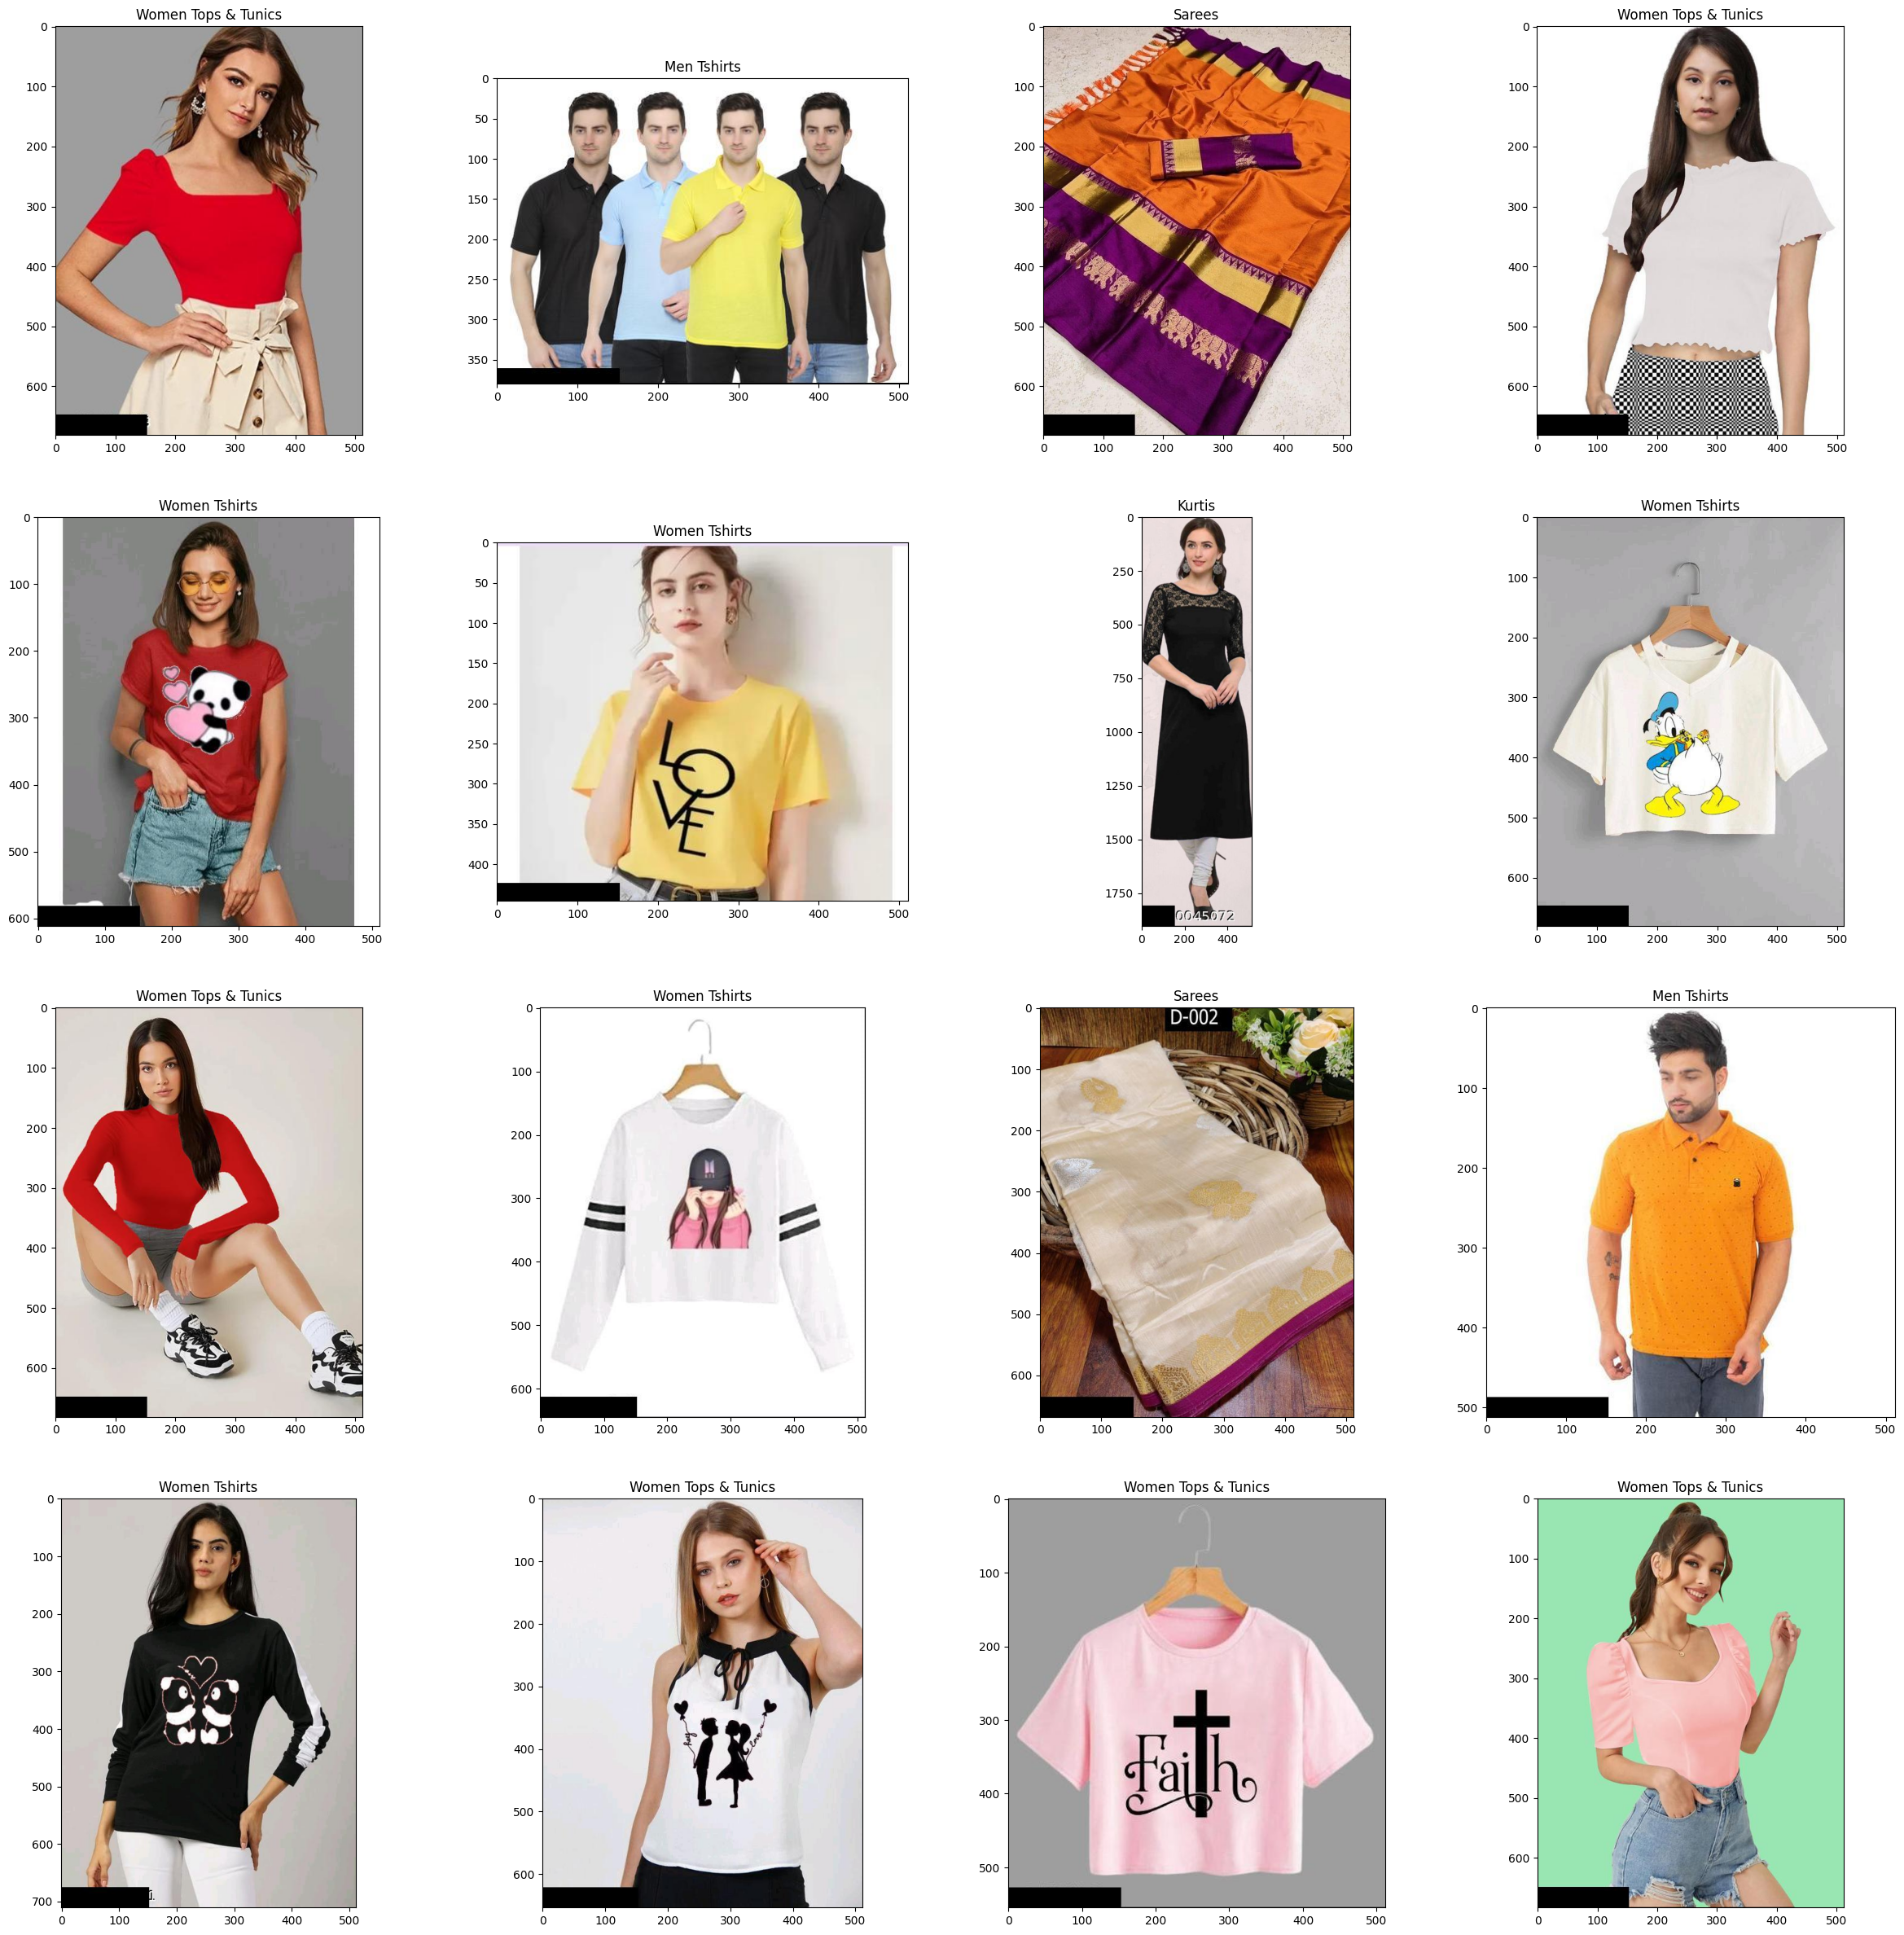

In [7]:
plt.figure(figsize=(30, 30))
for i in range(4):
    for j in range(4):
        idx = random.randint(0, len(df_train))
        img = Image.open(train_image_path / f'{idx:06d}.jpg')
        plt.subplot(4, 4, 4 * i + j + 1)

        plt.imshow(img)
        plt.title(df_train.loc[idx, 'Category'])
    
plt.show()



In [8]:
import torch
import torchvision
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset

In [9]:
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


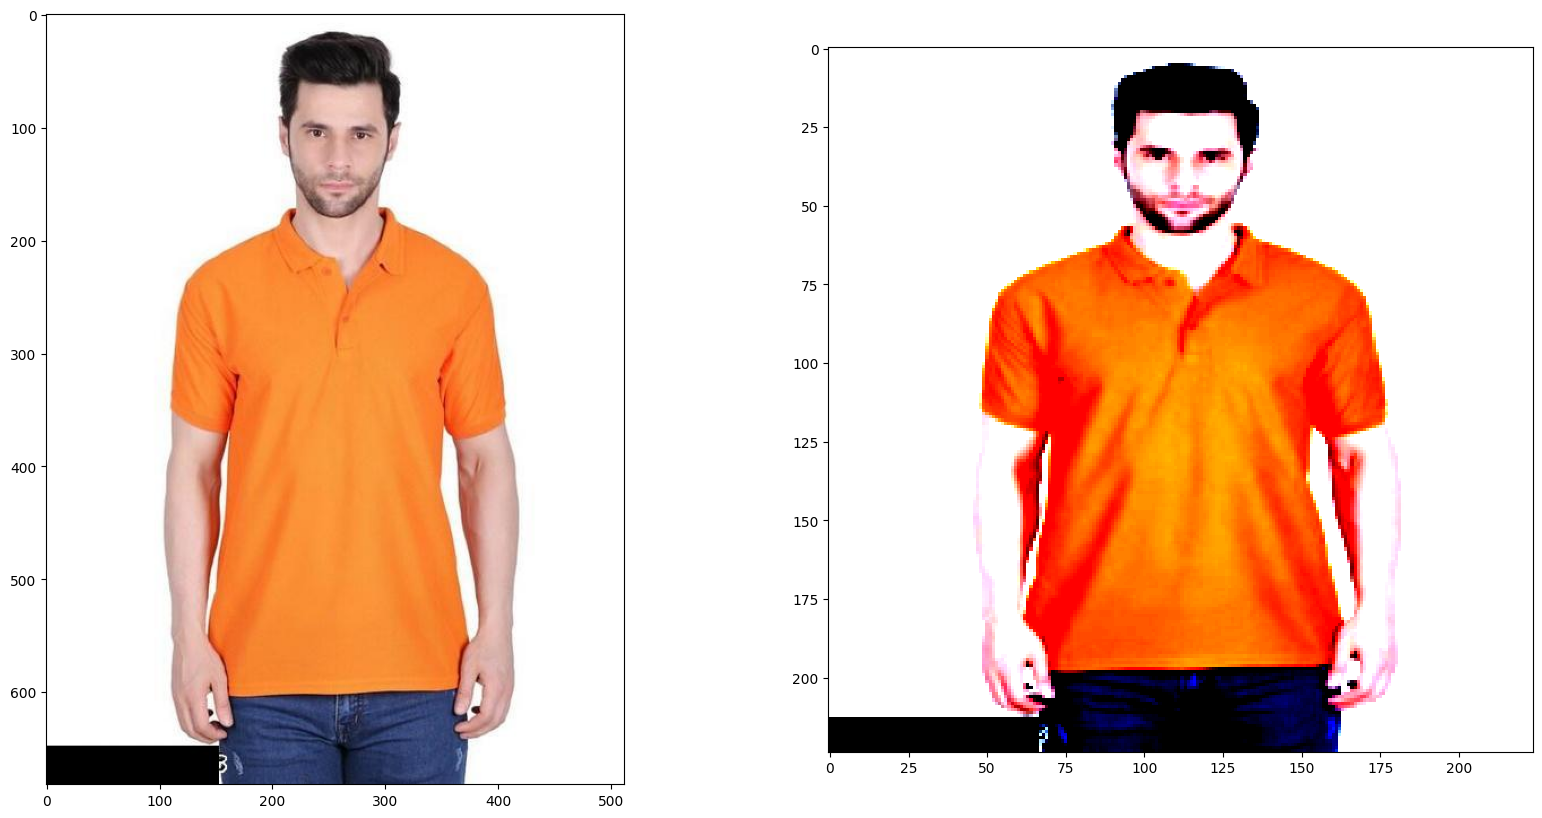

Men Tshirts


In [10]:
num = 560
img = Image.open(train_image_path / f'{num:06d}.jpg')
img_1 = data_transform(img)
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_1.permute(1, 2, 0))
plt.show()
print(df_train.loc[num, 'Category'])

In [12]:
df_train['Category'].value_counts()

Category
Women Tops & Tunics    19004
Women Tshirts          18774
Sarees                 18346
Men Tshirts             7267
Kurtis                  6822
Name: count, dtype: int64

In [19]:
values = [df_train[col].unique() for col in df_train.columns]
print(values)

[array([    0,     1,     2, ..., 70376, 70377, 70378]), array(['Men Tshirts', 'Sarees', 'Kurtis', 'Women Tshirts',
       'Women Tops & Tunics'], dtype=object), array([ 5, 10,  9,  8]), array(['default', 'multicolor', 'black', 'white', nan, 'same as saree',
       'solid', 'same as border', 'red', 'navy blue', 'maroon', 'green',
       'pink', 'blue', 'purple', 'grey', 'yellow', 'orange', 'peach'],
      dtype=object), array(['round', 'polo', nan, 'woven design', 'zari', 'no border', 'solid',
       'default', 'temple border', 'straight', 'a-line', 'loose', 'boxy',
       'regular', 'fitted'], dtype=object), array(['printed', 'solid', nan, 'small border', 'big border', 'no border',
       'knee length', 'calf length', 'long', 'crop', 'regular'],
      dtype=object), array(['default', 'solid', nan, 'typography', 'multicolor', 'cream',
       'white', 'navy blue', 'yellow', 'green', 'pink', 'daily', 'party',
       'printed', 'high', 'round neck', 'stylised', 'sweetheart neck',
       '

In [13]:
from keras.application import VGG16

2024-10-24 13:52:55.228566: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'keras.application'

In [22]:
list(values[1]).index('Men Tshirts')

0

In [31]:
def convert_attributes_to_tensor(df):
    attr_list = [list(values[i]).index(df.iloc[i]) for i in range(1, len(df))]
    return torch.tensor(attr_list)

In [32]:
convert_attributes_to_tensor(df_train.loc[10000])

tensor([1, 1, 4, 3, 2, 4, 6, 0, 0, 0, 0, 1])

In [33]:
class CustomDataset(Dataset):

    def __init__(self, 
                root_dir: str,
                root_csv: str,
                transform=None):

        self.root_dir = root_dir
        self.root_csv = root_csv
        self.transform = transform

    def __len__(self):
        return len(self.root_csv)

    def __getitem__(self, idx):

        img = Image(self.root_dir / f'{idx:06d}.jpg')
        transformed_img = self.transform(img)

        attributes = convert_attributes_to_tensor(self.root_csv.loc[idx])

        return transformed_img, attributes


In [34]:
train_dataset = CustomDataset(train_image_path, df_train, data_transform)

TypeError: 'module' object is not callable